# Simple Linear Regression Model

In [4]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.kernel_ridge import KernelRidge
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel
from sklearn.linear_model import Ridge
from sklearn.svm import SVR

from sklearn.impute import SimpleImputer

from sklearn.ensemble import IsolationForest

from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
def plot_2d_data(X, y):
    plt.plot(X, y, 'o', color='black');
    plt.show()

In [6]:
def train_k_fold(X, y, fold_num=10):
    kf = KFold(n_splits=fold_num, random_state=None, shuffle=False)
    kf.get_n_splits(X)
    train_score = 0.0
    test_score = 0.0
    for train_index, test_index in kf.split(X):
        X_train, X_val = X[train_index], X[test_index]
        y_train, y_val = y[train_index], y[test_index]

        reg = LinearRegression().fit(X_train, y_train)
        y_train_pred = reg.predict(X_train)
        y_test_pred = reg.predict(X_val)

        train_score += r2_score(y_train, y_train_pred)
        test_score += r2_score(y_val, y_test_pred)

    print("Training score: %f"%(train_score/10.0))
    print("Validation score: %f"%(test_score/10.0))

In [7]:
X_train_data = np.array(pd.read_csv('X_train.csv'))
y_train_data = np.array(pd.read_csv('y_train.csv'))
X_test_data = np.array(pd.read_csv('X_test.csv'))
indices_test = X_test_data[:,0]
X_test = X_test_data[:,1:]
print(X_test.shape)
y = y_train_data[:,1]
X = X_train_data[:,1:]

(776, 832)


## 1. Imputation of Missing Values
* [Reference](https://scikit-learn.org/stable/modules/impute.html)

In [8]:
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit(X)
X = imp.transform(X)
X_test = imp.transform(X_test)

## 2. Outlier Detection
* [reference_sklearn](https://scikit-learn.org/stable/modules/outlier_detection.html)
* [reference_in_detail](https://practicaldatascience.co.uk/machine-learning/how-to-use-the-isolation-forest-model-for-outlier-detection)

In [6]:
# iforest = IsolationForest(contamination=0.3)
# iforest.fit(X)
# outlier_pred = iforest.predict(X)
# print(X.shape)
# X, y = X[(outlier_pred != -1), :], y[(outlier_pred != -1)]
# print(X.shape)

## 2. Feature Selection

In [9]:
# sel = VarianceThreshold(threshold=(.8 * (1 - .8)))
# X_train = sel.fit_transform(X_train)
print(X_test.shape)
pca = PCA(n_components=10)
X = pca.fit_transform(X)
X_test = pca.transform(X_test)
print(X_test.shape)

(776, 832)
(776, 10)


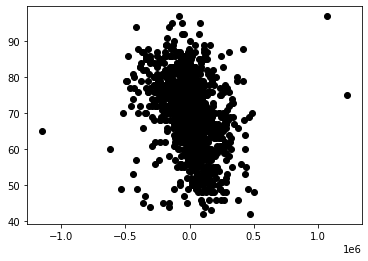

In [15]:
plot_2d_data(X[:, 4], y)

## 4. Predict and Output

In [10]:
train_k_fold(X, y)

Training score: 0.103866
Validation score: 0.079480


In [11]:
reg = LinearRegression().fit(X, y)
Y_test = reg.predict(X_test)
print(X_test.shape)
print(Y_test.shape)
final_res = np.vstack((indices_test, Y_test)).T

(776, 10)
(776,)


In [12]:
df_res = pd.DataFrame(final_res)
df_res.to_csv("our_result.csv", header = ["id", "y"], index=False)